In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

In [2]:
df = pd.read_csv('/content/Dataset_VIH_vs_Sano_v3.csv')
df.head()

,Sexo,Adherencia_Tratamiento,Tipo_Tratamiento,Edad,Carga_Viral_Log,Carga_Viral_Ajustada,CD4,Nivel_Riesgo_Conductual,Ocupacion,Clase
0,Hombre,Alta,ARV_B,41,5.12,5.267437,1040,Muy Bajo,Estudiante,VIH
1,Mujer,Media,ARV_B,69,5.12,5.475735,718,Muy Alto,Independiente,VIH
2,Hombre,Baja,ARV_B,28,5.12,5.404298,258,Bajo,Estudiante,VIH
3,Hombre,Alta,ARV_A,66,9.12,9.425371,1084,Muy Bajo,Estudiante,VIH
4,Hombre,Media,ARV_B,25,5.19,5.391640,547,Bajo,Desempleado,VIH


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Sexo                     120 non-null    object 
 1   Adherencia_Tratamiento   120 non-null    object 
 2   Tipo_Tratamiento         120 non-null    object 
 3   Edad                     120 non-null    int64  
 4   Carga_Viral_Log          120 non-null    float64
 5   Carga_Viral_Ajustada     120 non-null    float64
 6   CD4                      120 non-null    int64  
 7   Nivel_Riesgo_Conductual  120 non-null    object 
 8   Ocupacion                120 non-null    object 
 9   Clase                    120 non-null    object 
dtypes: float64(2), int64(2), object(6)
memory usage: 9.5+ KB


### Check for Unique Categories

In [4]:
# sexo
df["Sexo"].unique()

array(['Hombre', 'Mujer'], dtype=object)

In [5]:
# Adherencia_Tratamiento
df["Adherencia_Tratamiento"].unique()

array(['Alta', 'Media', 'Baja'], dtype=object)

In [6]:
# Tipo_Tratamiento
df["Tipo_Tratamiento"].unique()

array(['ARV_B', 'ARV_A'], dtype=object)

In [7]:
# Nivel_Riesgo_Conductual
df["Nivel_Riesgo_Conductual"].unique()

array(['Muy Bajo', 'Muy Alto', 'Bajo', 'Alto', 'Moderado'], dtype=object)

In [8]:
# Ocupacion
df["Ocupacion"].unique()

array(['Estudiante', 'Independiente', 'Desempleado', 'Jubilado',
       'Empleado'], dtype=object)

### Take a look at the target

In [9]:
#Clase
df["Clase"].value_counts()

# Target is balanced

,count
Clase,
VIH,66
Sano,54


### Check correlation between Carga_Viral_Log and Carga_Viral_Ajustada

In [10]:
df[['Carga_Viral_Log', 'Carga_Viral_Ajustada']].corr()

# they are highly autocorrelated so we drop one of them

,Carga_Viral_Log,Carga_Viral_Ajustada
Carga_Viral_Log,1.000000,0.996073
Carga_Viral_Ajustada,0.996073,1.000000


In [11]:
# drop Carga_Viral_Log column to avoid multicollinearity
df = df.drop(["Carga_Viral_Log"], axis= 1)
df.head()

,Sexo,Adherencia_Tratamiento,Tipo_Tratamiento,Edad,Carga_Viral_Ajustada,CD4,Nivel_Riesgo_Conductual,Ocupacion,Clase
0,Hombre,Alta,ARV_B,41,5.267437,1040,Muy Bajo,Estudiante,VIH
1,Mujer,Media,ARV_B,69,5.475735,718,Muy Alto,Independiente,VIH
2,Hombre,Baja,ARV_B,28,5.404298,258,Bajo,Estudiante,VIH
3,Hombre,Alta,ARV_A,66,9.425371,1084,Muy Bajo,Estudiante,VIH
4,Hombre,Media,ARV_B,25,5.391640,547,Bajo,Desempleado,VIH


### Exploratory Data Analysis

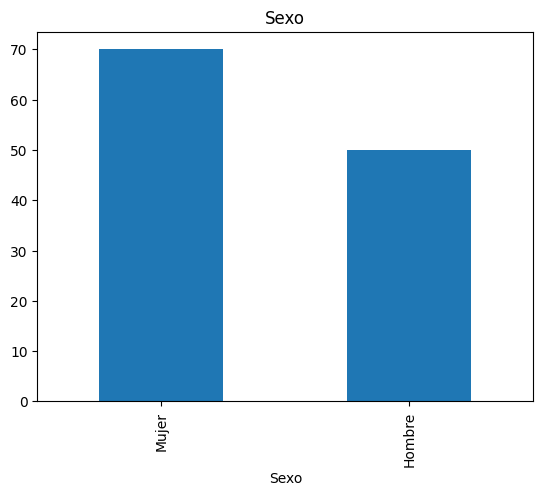

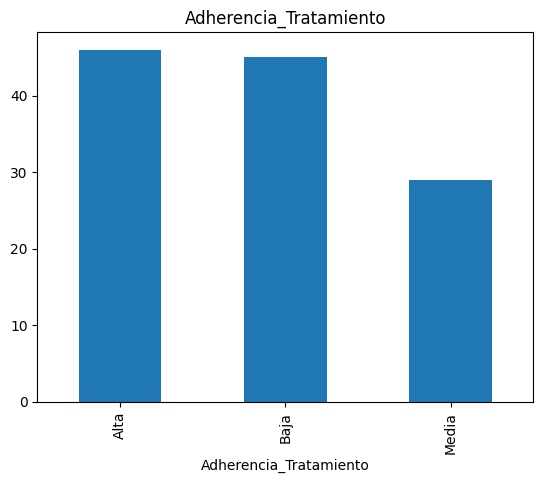

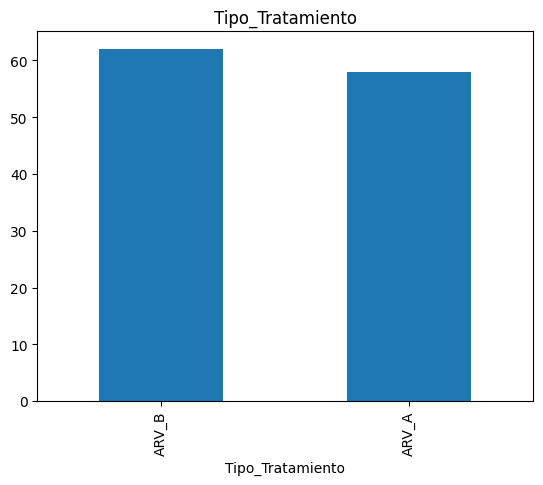

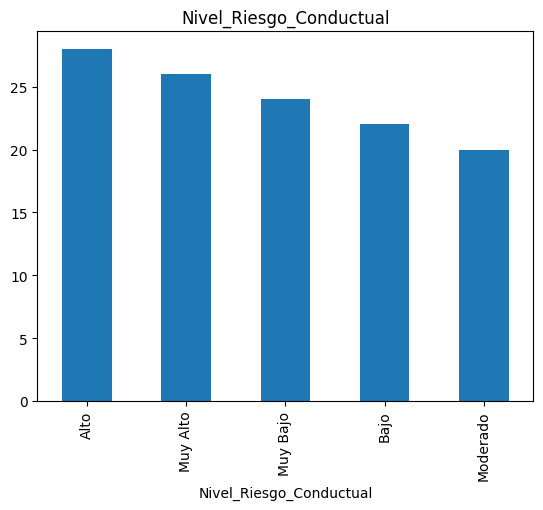

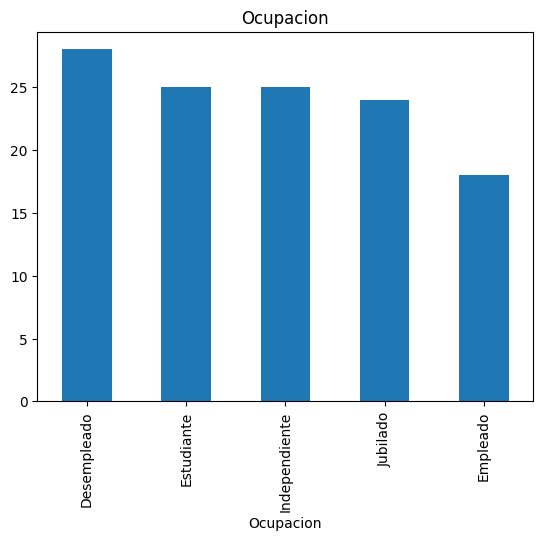

In [12]:
# Categorical Variables Plots

for i in ["Sexo", "Adherencia_Tratamiento", "Tipo_Tratamiento", "Nivel_Riesgo_Conductual", "Ocupacion"]:
  df[i].value_counts().plot(kind="bar")
  plt.title(i)
  plt.show()

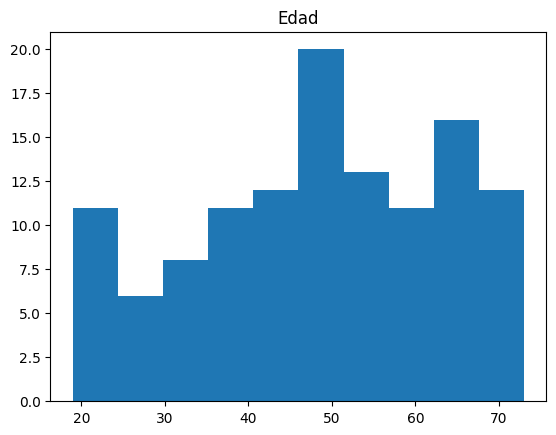

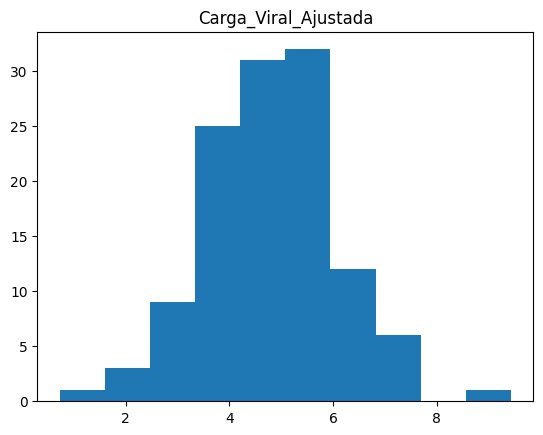

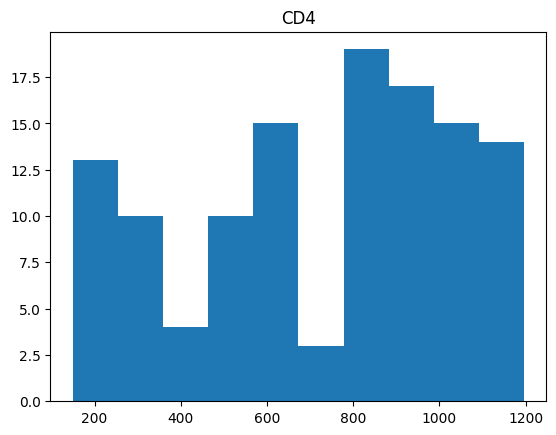

In [13]:
# Numeric Variables Plots
for i in ["Edad",	"Carga_Viral_Ajustada",	"CD4"]:
  plt.hist(df[i])
  plt.title(i)
  plt.show()

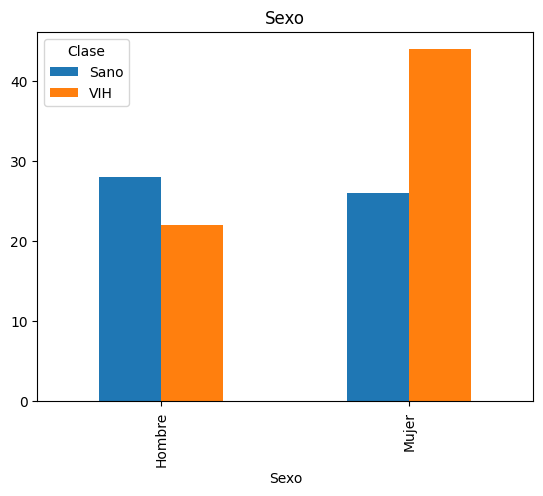

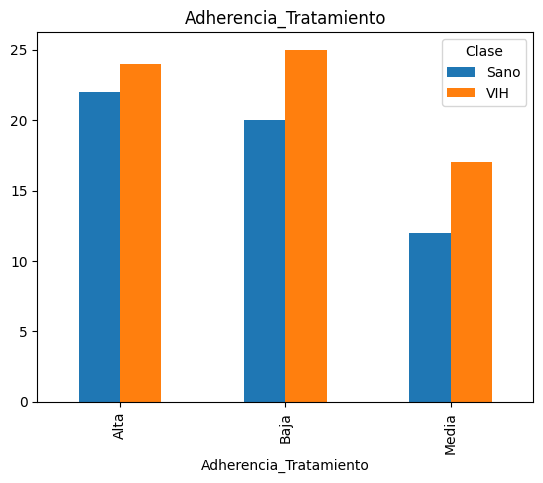

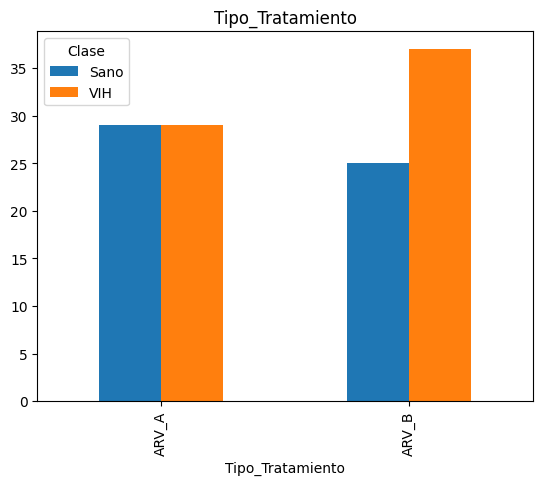

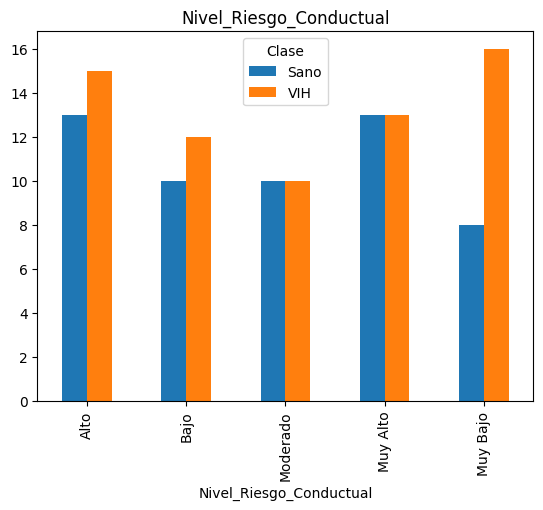

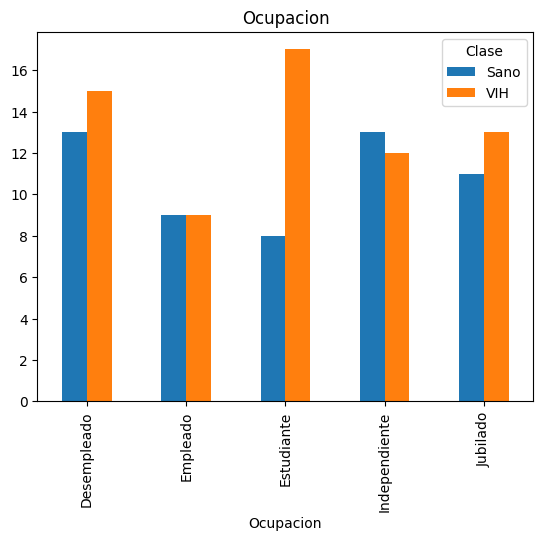

In [14]:
for i in ["Sexo", "Adherencia_Tratamiento", "Tipo_Tratamiento", "Nivel_Riesgo_Conductual", "Ocupacion"]:
    pd.crosstab(df[i], df["Clase"]).plot(kind="bar")
    plt.title(i)
    plt.show()

### Correlation Matrix

<Axes: >

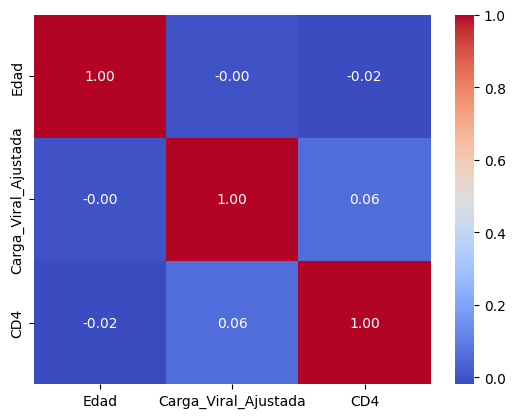

In [15]:
correlation = df.corr(numeric_only=True)
sns.heatmap(correlation, annot=True, fmt=".2f", cmap="coolwarm")

# Older people do not necessarily have higher or lower viral load. (-0.00)
# Edad vs CD4 = -0.02: Age is NOT linearly related to CD4 count.
# Carga_Viral_Ajustada vs CD4 = 0.06: Viral load and CD4 are almost unrelated in a linear way.
# There is NO multicollinearity problem.

### Data Preposessing

In [16]:
# Encode Target Variable
df["Clase"] = df["Clase"].map({"Sano": 0, "VIH": 1})

In [17]:
# Separate features and target
X = df.drop("Clase", axis=1) #here we are taking everything except the target variable, to encode the objects with one-hot
y = df["Clase"]

# One-hot encode
X = pd.get_dummies(X, drop_first=True)

In [18]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 15 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Edad                              120 non-null    int64  
 1   Carga_Viral_Ajustada              120 non-null    float64
 2   CD4                               120 non-null    int64  
 3   Sexo_Mujer                        120 non-null    bool   
 4   Adherencia_Tratamiento_Baja       120 non-null    bool   
 5   Adherencia_Tratamiento_Media      120 non-null    bool   
 6   Tipo_Tratamiento_ARV_B            120 non-null    bool   
 7   Nivel_Riesgo_Conductual_Bajo      120 non-null    bool   
 8   Nivel_Riesgo_Conductual_Moderado  120 non-null    bool   
 9   Nivel_Riesgo_Conductual_Muy Alto  120 non-null    bool   
 10  Nivel_Riesgo_Conductual_Muy Bajo  120 non-null    bool   
 11  Ocupacion_Empleado                120 non-null    bool   
 12  Ocupacio

### Analysis

In [19]:
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report

def classify(model):
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, # we made them before for encoding
        test_size=0.20,
        random_state=42,
        stratify=y) # Make sure the train and test sets keep the same class proportion as the original dataset

    model.fit(X_train, y_train) # Train model

    y_pred = model.predict(X_test)  # Predict

    # Accuracy
    acc = accuracy_score(y_test, y_pred)
    print("Test Accuracy:", acc)

    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    # Cross-validation
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42) # For each fold, maintain the same class distribution
    score = cross_val_score(model, X, y, cv=cv)

    print("Cross-Validation Mean Accuracy:", np.mean(score))
    print("Cross-Validation Standard Deviation:", np.std(score))

### Decision Tree


In [20]:
from sklearn.tree import DecisionTreeClassifier
decision_tree_model = DecisionTreeClassifier()
classify(decision_tree_model)

Test Accuracy: 0.9583333333333334

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.91      0.95        11
           1       0.93      1.00      0.96        13

    accuracy                           0.96        24
   macro avg       0.96      0.95      0.96        24
weighted avg       0.96      0.96      0.96        24

Cross-Validation Mean Accuracy: 0.9333333333333333
Cross-Validation Standard Deviation: 0.05651941652604389


### Random Forest

In [21]:
from sklearn.ensemble import RandomForestClassifier
random_forest_model = RandomForestClassifier()
classify(random_forest_model)

Test Accuracy: 0.9166666666666666

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.82      0.90        11
           1       0.87      1.00      0.93        13

    accuracy                           0.92        24
   macro avg       0.93      0.91      0.91        24
weighted avg       0.93      0.92      0.92        24

Cross-Validation Mean Accuracy: 0.9416666666666668
Cross-Validation Standard Deviation: 0.042491829279939886


### XGBoost

In [22]:
from xgboost import XGBClassifier

xgboost_model = XGBClassifier(use_label_encoder=False, eval_metric="logloss")
classify(xgboost_model)

Test Accuracy: 1.0

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13

    accuracy                           1.00        24
   macro avg       1.00      1.00      1.00        24
weighted avg       1.00      1.00      1.00        24

Cross-Validation Mean Accuracy: 0.9416666666666668
Cross-Validation Standard Deviation: 0.062360956446232345


### Why did we got such AMAZING results?

In [23]:
from sklearn.inspection import permutation_importance # works for any model (intead of feature importance)

models = {
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="logloss")
}

for name, model in models.items():
    model.fit(X, y)
    result = permutation_importance(model, X, y, n_repeats=10, random_state=40)
    importance = pd.Series(result.importances_mean, index=X.columns)

    print(f"\n{name} Feature Importance:")
    print(importance.sort_values(ascending=False).head(5))

# The results show that Carga_Viral_Ajustada and CD4 dominate feature importance
# across all models, while other variables have very small impact.
# This confirms that the dataset is strongly separable and that most of the
# predictive signal comes from viral load and CD4 levels.


Decision Tree Feature Importance:
Carga_Viral_Ajustada           0.394167
CD4                            0.173333
Edad                           0.008333
Sexo_Mujer                     0.000000
Adherencia_Tratamiento_Baja    0.000000
dtype: float64

Random Forest Feature Importance:
Carga_Viral_Ajustada           0.367500
CD4                            0.175000
Ocupacion_Jubilado             0.004167
Sexo_Mujer                     0.000000
Adherencia_Tratamiento_Baja    0.000000
dtype: float64

XGBoost Feature Importance:
Carga_Viral_Ajustada           0.409167
CD4                            0.172500
Edad                           0.003333
Sexo_Mujer                     0.000000
Adherencia_Tratamiento_Baja    0.000000
dtype: float64


### XGBoost (Best Model) Confusion Matrix

In [25]:
from sklearn.metrics import confusion_matrix
X_train, X_test, y_train, y_test = train_test_split(
        X, y,
        test_size=0.20,
        random_state=42,
        stratify=y)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Confusion Matrix XGBoost:\n")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix XGBoost:

[[11  0]
 [ 0 13]]
